In [23]:
import pandas as pd
data = pd.read_csv('boston.csv')    #load the dataset
data.info()
data.isna().sum()   #check if there exists any Nan/Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

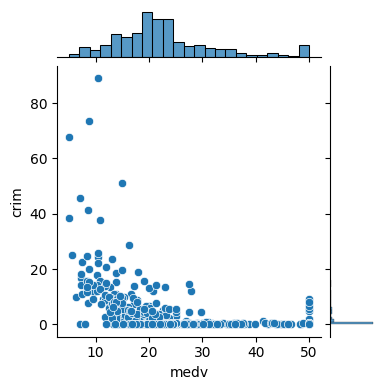

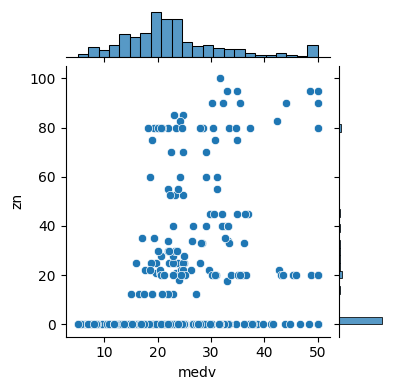

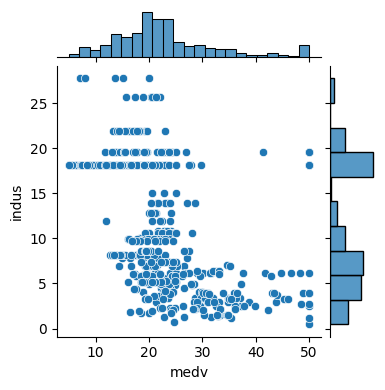

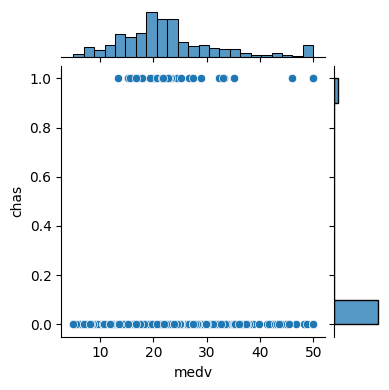

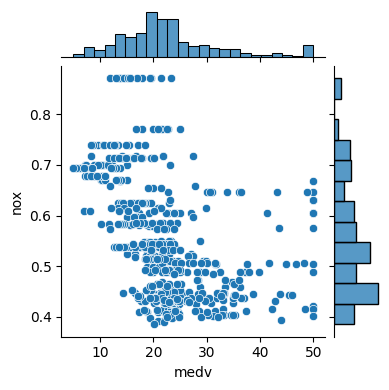

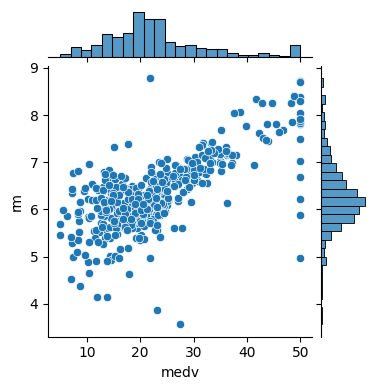

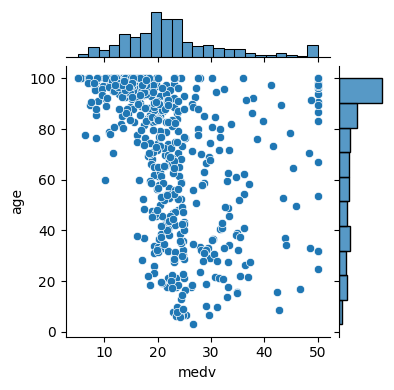

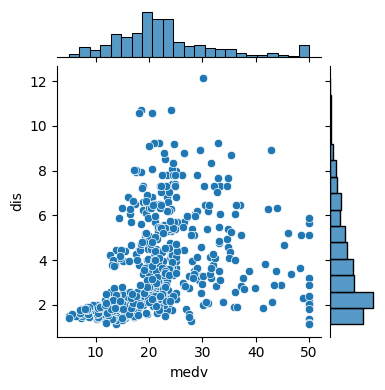

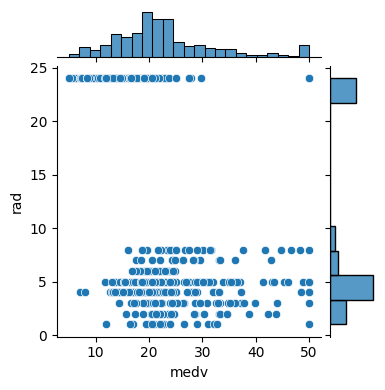

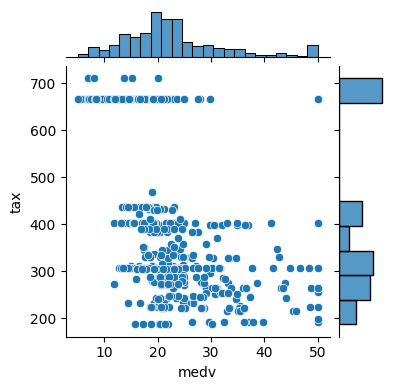

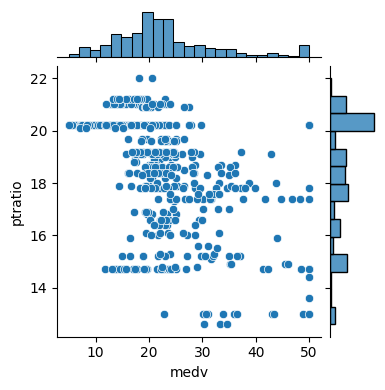

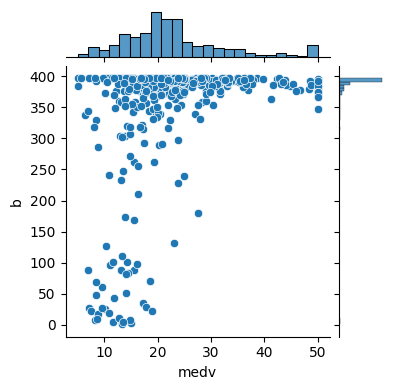

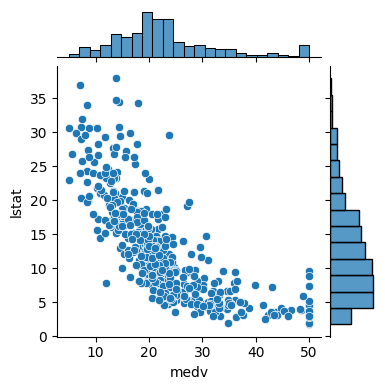

In [24]:
import seaborn as sns
for i in range(13):
    sns.jointplot(x = 'medv', y = data.columns[i], data = data, height=4)

Select 4 attributes with the highest correlation:
Index(['lstat', 'rm', 'ptratio', 'indus'], dtype='object')


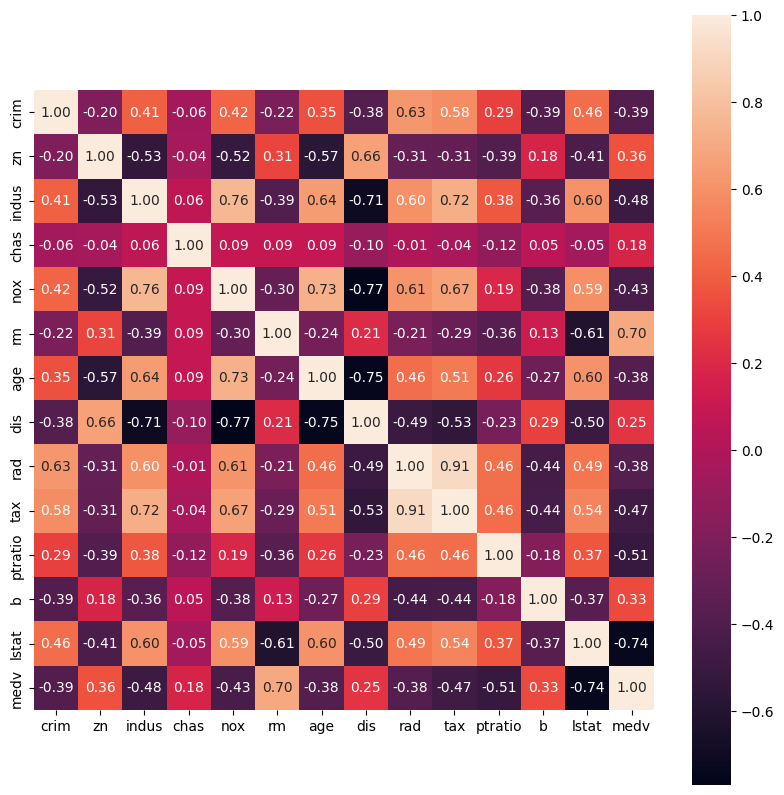

In [25]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
corr = data.corr().abs()
sns.heatmap(data.corr(), annot=True, square=True, fmt = ".2f", annot_kws={"size":10})
cols =  corr.nlargest(5,'medv')['medv'].index
print('Select 4 attributes with the highest correlation:')
print(cols[1:5])

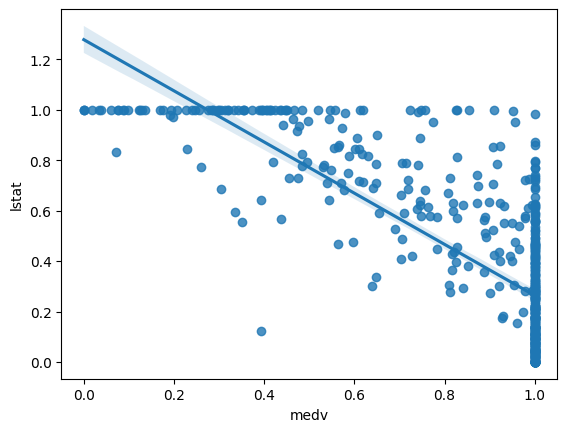

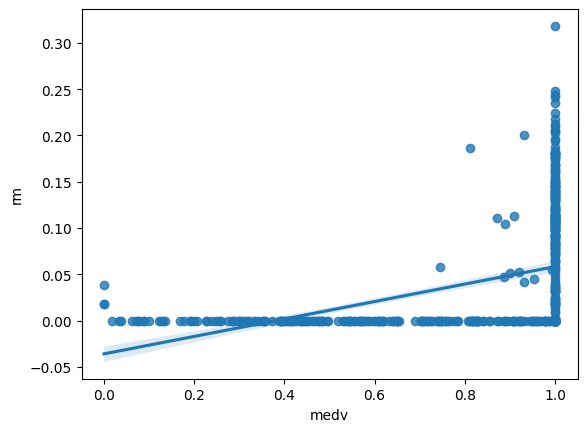

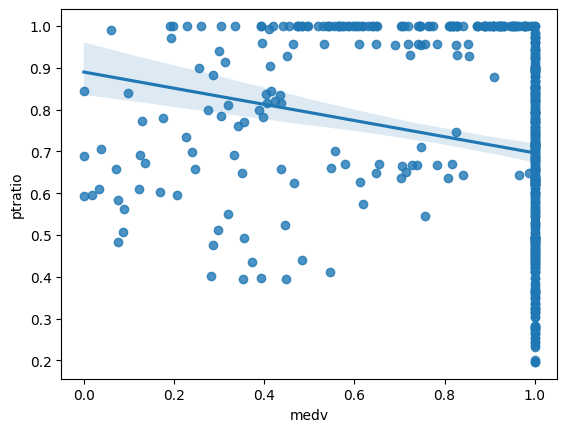

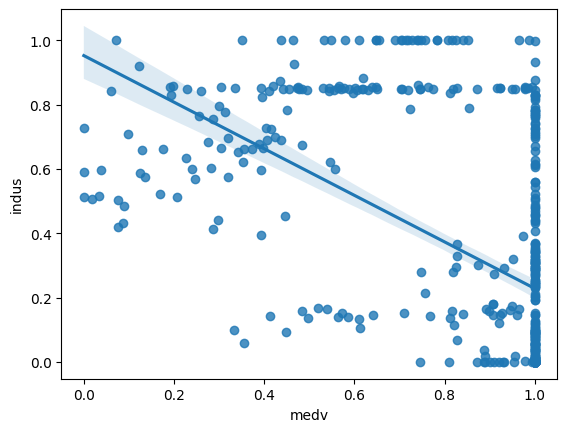

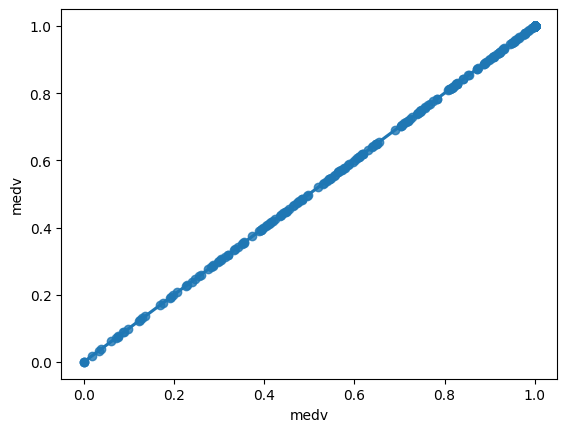

In [26]:
from sklearn.preprocessing import MinMaxScaler

data.drop(columns = ['crim', 'zn', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'b'],inplace=True)

scaler = MinMaxScaler()
data2 = []
cols = ['lstat', 'rm', 'ptratio', 'indus','medv']
for col in cols:
    data2.append(data[col])
scaler.fit_transform(data2)

data['lstat'] = scaler.transform(data2)[0]
data['rm'] = scaler.transform(data2)[1]
data['ptratio'] = scaler.transform(data2)[2]
data['indus'] = scaler.transform(data2)[3]
data['medv'] = scaler.transform(data2)[4]

for col in cols:
    sns.regplot(x = 'medv', y = col, data = data, ci=95)
    plt.show()

In [27]:
import numpy as np

training_data = data.sample(frac = 0.8, random_state = 10)
test_data = data.drop(training_data.index)
training_data = training_data.reset_index()

Y = training_data['medv']
Z = test_data['medv']
training_data.drop(columns = ['index','medv'], inplace=True)
test_data.drop(columns = ['medv'], inplace=True)

points=np.array(training_data)
test_points = np.array(test_data)

0   RMSE:  0.6301
1   RMSE:  0.5416
2   RMSE:  0.5071
3   RMSE:  0.4890
4   RMSE:  0.4758
5   RMSE:  0.4645
6   RMSE:  0.4542
7   RMSE:  0.4446
8   RMSE:  0.4357
9   RMSE:  0.4274
10   RMSE:  0.4197
11   RMSE:  0.4125
12   RMSE:  0.4058
13   RMSE:  0.3996
14   RMSE:  0.3938
15   RMSE:  0.3884
16   RMSE:  0.3834
17   RMSE:  0.3788
18   RMSE:  0.3745
19   RMSE:  0.3705
20   RMSE:  0.3668
21   RMSE:  0.3633
22   RMSE:  0.3601
23   RMSE:  0.3571
24   RMSE:  0.3544
25   RMSE:  0.3518
26   RMSE:  0.3494
27   RMSE:  0.3472
28   RMSE:  0.3452
29   RMSE:  0.3433
30   RMSE:  0.3415
31   RMSE:  0.3398
32   RMSE:  0.3383
33   RMSE:  0.3369
34   RMSE:  0.3355
35   RMSE:  0.3343
36   RMSE:  0.3331
37   RMSE:  0.3320
38   RMSE:  0.3310
39   RMSE:  0.3300
40   RMSE:  0.3291
41   RMSE:  0.3283
42   RMSE:  0.3275
43   RMSE:  0.3268
44   RMSE:  0.3261
45   RMSE:  0.3254
46   RMSE:  0.3248
47   RMSE:  0.3242
48   RMSE:  0.3237
49   RMSE:  0.3231
50   RMSE:  0.3226
51   RMSE:  0.3222
52   RMSE:  0.3217
53 

Text(0.5, 1.0, 'learning rate is: 0.5')

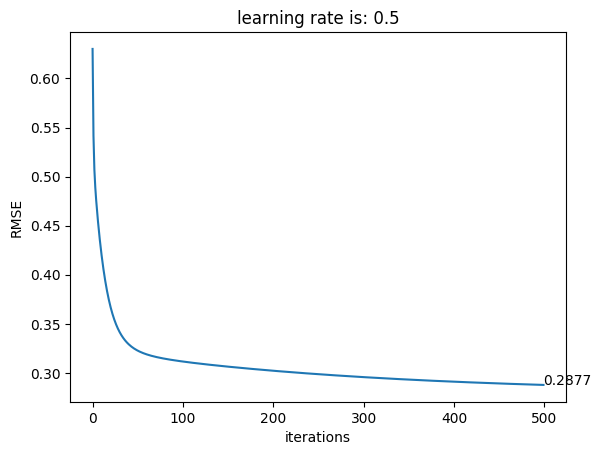

In [28]:
def step_gradient(points, learning_rate, w):
    w_slope = np.zeros(4)
    M = len(points)
    for i in range(M):
        x = points[i]
        y = Y[i]
        for j in range(4):
            w_slope[j] = w_slope[j] + (1/M) * (np.dot(w, x) - y) * x[j] 
    for j in range(4):
        w[j] = w[j] - learning_rate*w_slope[j]
    return w

def gd(points, learning_rate, num_iterations):
    w=np.zeros(4)
    for i in range(num_iterations):
        w = step_gradient(points, learning_rate, w)
        error = RMSE(points, w)
        print(str(i) + '   RMSE:  {:.4f}'.format(error))
        errors.append(error)
    return w

def RMSE(points, w):
    total_rmse = 0
    M = len(points)
    for i in range(M):
        x = points[i]
        y = Y[i]
        total_rmse += (1/M)*((y - np.dot(w,x) )**2)
    return total_rmse**(1/2)

learning_rate = 0.5
num_iterations = 500
errors = []
w = gd(points, learning_rate, num_iterations)
print(w)

x = range(500)
plt.plot(x,errors)
plt.annotate(text = '{:.4f}'.format(errors[499]), xy = (x[499],errors[499]))
plt.xlabel('iterations')
plt.ylabel('RMSE')
plt.title('learning rate is: '+str(learning_rate))


In [29]:
N = len(test_points)

# indexs = np.array(Z.index)
origin_data = scaler.inverse_transform(Z.index)
for i in range(N):
    print(str(indexs[i]) + '    True:  ' + str(origin_data[i]) + '     Prediction:  {:.2f}'.format((np.dot(w,test_points[i,:]))))

ValueError: Expected 2D array, got 1D array instead:
array=[  4.   8.  11.  13.  15.  16.  18.  31.  33.  40.  44.  54.  62.  71.
  73.  74.  77.  85.  89.  93.  94. 112. 118. 122. 123. 125. 133. 134.
 135. 140. 141. 143. 145. 150. 156. 158. 177. 179. 182. 200. 203. 216.
 221. 234. 239. 243. 246. 248. 250. 256. 265. 268. 271. 283. 284. 286.
 289. 290. 292. 306. 313. 320. 321. 342. 344. 348. 352. 356. 360. 363.
 364. 369. 371. 382. 393. 395. 406. 407. 409. 413. 420. 421. 422. 430.
 436. 437. 445. 452. 453. 462. 470. 473. 481. 482. 483. 484. 485. 490.
 498. 500. 502.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.